# <u>*SDG 4: Quality Education: Analyzing Factors Influencing Student Performance*</u>


![student](student.jpg)


## Data Overview

### **Introduction**

**Student performance data** typically involves information about students' academic achievements, behaviors, and other related factors. This data can include scores, grades, attendance records, demographic information, and other metrics that provide insights into students' academic performance and overall educational experience.

### **Techniques**

1. **Descriptive Statistics**: Summarizes the basic features of the data, including mean, median, mode, standard deviation, and frequency distributions.
2. **Exploratory Data Analysis (EDA)**: Uses visualization techniques (e.g., histograms, box plots, scatter plots) to understand data distributions and relationships.
3. **Regression Analysis**: Determines relationships between dependent variables (e.g., final grades) and independent variables (e.g., study hours, attendance).
4. **Classification**: Predicts categorical outcomes, such as pass/fail or grade categories, using technique like random forests.
5. **Clustering**: Groups students into clusters based on similar characteristics or performance metrics using methods like K-means or hierarchical clustering.
6. **Correlation Analysis**: Measures the strength and direction of relationships between different variables, such as attendance and grades.

### **Process**

1. **Data Collection**: Gather data from various sources, such as student records, surveys, or academic performance databases.
2. **Data Cleaning**: Handle missing values, correct inconsistencies, and remove duplicates to ensure data quality.
3. **Data Exploration**: Conduct initial analysis to understand data distributions, identify patterns, and detect anomalies.
4. **Feature Engineering**: Create new features or transform existing ones to improve model performance, such as converting categorical data to numerical values.
5. **Model Selection and Training**: Choose appropriate algorithms and train models on the data to make predictions or classify students.
6. **Evaluation**: Assess model performance using metrics like accuracy, precision, recall, and F1 score.
7. **Interpretation and Visualization**: Generate visualizations and interpret results to derive actionable insights.
8. **Deployment**: Implement models in real-world scenarios, such as academic advising systems or student performance dashboards.

### **Applications**

1. **Academic Advising**: Helps educators and advisors identify students at risk of falling behind and provide targeted support.
2. **Performance Prediction**: Predicts future academic performance based on historical data, helping to tailor learning interventions.
3. **Curriculum Development**: Assists in designing curricula that address common areas of difficulty or enhance overall educational outcomes.
4. **Personalized Learning**: Customizes learning experiences based on individual student needs and performance patterns.
5. **Educational Research**: Provides insights into factors influencing student performance, contributing to academic research and policy development.

### **Uses**

1. **Improving Teaching Strategies**: Identifies effective teaching methods and areas needing improvement.
2. **Student Retention**: Helps in identifying students who may be at risk of dropping out and implementing retention strategies.
3. **Resource Allocation**: Guides the allocation of resources and support services to areas where they are most needed.
4. **Policy Making**: Informs educational policies and practices based on empirical evidence of factors affecting student performance.
5. **Parental Involvement**: Engages parents by providing insights into their child’s performance and areas for improvement.


## Data Description
- StudentID: A unique identifier assigned to each student (1001 to 3392).
- Demographic Details
    * Age: The age of the students ranges from 15 to 18 years.
    * Gender: Gender of the students, where 0 represents Male and 1 represents Female.
    * Ethnicity: The ethnicity of the students, coded as follows:
        + 0: Caucasian
        + 1: African American
        + 2: Asian
        + 3: Other
    * ParentalEducation: The education level of the parents, coded as follows:
        + 0: None
        + 1: High School
        + 2: Some College
        + 3: Bachelor's
        + 4: Higher
- Study Habits
    * StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
    * Absences: Number of absences during the school year, ranging from 0 to 30.
    * Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.
- Parental Involvement
    * ParentalSupport: The level of parental support, coded as follows:
        + 0: None
        + 1: Low
        + 2: Moderate
        + 3: High
        + 4: Very High
- Extracurricular Activities
    * Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
    * Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
    * Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
    * Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.
        Academic Performance
- GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable: Grade Class
    * GradeClass: Classification of students' grades based on GPA:
        + 0: 'A' (GPA >= 3.5)
        + 1: 'B' (3.0 <= GPA < 3.5)
        + 2: 'C' (2.5 <= GPA < 3.0)
        + 3: 'D' (2.0 <= GPA < 2.5)
        + 4: 'F' (GPA < 2.0)


In [88]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [89]:
#data reading
data=pd.read_csv("Student_performance_data _.csv")

In [90]:
#view of 5 rows
data.head()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3.042915         1.0  
2             0  0.112602         4.0  
3             0  2.054218         3.0  
4             0  1.288061         4.0

In [91]:
#descriptive statistics
data.describe().T

count         mean         std          min          25%  \
StudentID          2392.0  2196.500000  690.655244  1001.000000  1598.750000   
Age                2392.0    16.468645    1.123798    15.000000    15.000000   
Gender             2392.0     0.510870    0.499986     0.000000     0.000000   
Ethnicity          2392.0     0.877508    1.028476     0.000000     0.000000   
ParentalEducation  2392.0     1.746237    1.000411     0.000000     1.000000   
StudyTimeWeekly    2392.0     9.771992    5.652774     0.001057     5.043079   
Absences           2392.0    14.541388    8.467417     0.000000     7.000000   
Tutoring           2392.0     0.301421    0.458971     0.000000     0.000000   
ParentalSupport    2392.0     2.122074    1.122813     0.000000     1.000000   
Extracurricular    2392.0     0.383361    0.486307     0.000000     0.000000   
Sports             2392.0     0.303512    0.459870     0.000000     0.000000   
Music              2392.0     0.196906    0.397744     0.000000     0.000000   
Volunteering       2392.0     0.157191    0.364057     0.000000     0.000000   
GPA                2392.0     1.906186    0.915156     0.000000     1.174803   
GradeClass         2392.0     2.983696    1.233908     0.000000     2.000000   

                           50%          75%          max  
StudentID          2196.500000  2794.250000  3392.000000  
Age                  16.000000    17.000000    18.000000  
Gender                1.000000     1.000000     1.000000  
Ethnicity             0.000000     2.000000     3.000000  
ParentalEducation     2.000000     2.000000     4.000000  
StudyTimeWeekly       9.705363    14.408410    19.978094  
Absences             15.000000    22.000000    29.000000  
Tutoring              0.000000     1.000000     1.000000  
ParentalSupport       2.000000     3.000000     4.000000  
Extracurricular       0.000000     1.000000     1.000000  
Sports                0.000000     1.000000     1.000000  
Music                 0.000000     0.000000     1.000000  
Volunteering          0.000000     0.000000     1.000000  
GPA                   1.893393     2.622216     4.000000  
GradeClass            4.000000     4.000000     4.000000

In [92]:
#info of all column's data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [93]:
#convert data type from num to category
data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass']]=data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass']].astype(object)

In [94]:
#testing above code
data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ethnicity          2392 non-null   object
 1   ParentalEducation  2392 non-null   object
 2   Gender             2392 non-null   object
 3   Tutoring           2392 non-null   object
 4   ParentalSupport    2392 non-null   object
 5   Extracurricular    2392 non-null   object
 6   Sports             2392 non-null   object
 7   Music              2392 non-null   object
 8   Volunteering       2392 non-null   object
 9   GradeClass         2392 non-null   object
dtypes: object(10)
memory usage: 187.0+ KB


In [95]:
#dimension
data.shape

(2392, 15)

In [96]:
#null or missing values
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [97]:
#duplicate values
data[data.duplicated()]

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []

### Conclusion 
- no missing value
- no duplicate value

# EDA

## >>univariate
### >>>>Numerical  columns
- no outlier in all numeric columns
- Absences is negatively skewed 
- no distribution except GPA..shows mostly students are average 

In [98]:
Num_features=data.select_dtypes(['int64','float64']).columns
Num_features = Num_features.drop('StudentID')
Num_features

Index(['Age', 'StudyTimeWeekly', 'Absences', 'GPA'], dtype='object')

#### Histogram 

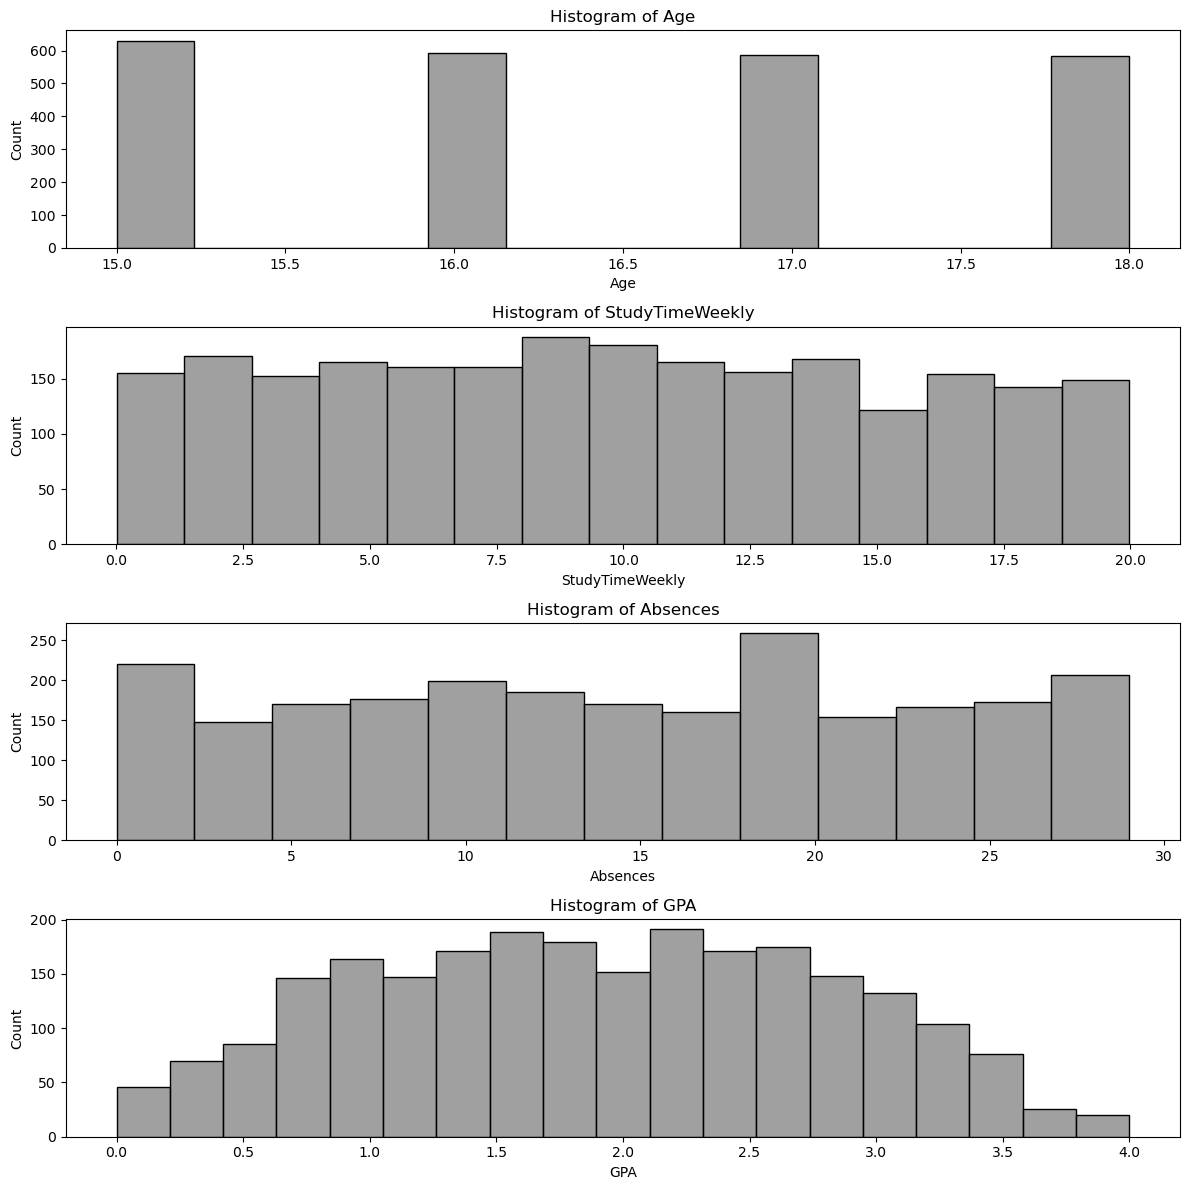

In [99]:
n_plots=len(Num_features)
fig,axes=plt.subplots(n_plots,1,figsize=(12,12))
for i,feature in enumerate(Num_features):
        sns.histplot(x=data[feature],ax=axes[i],color='Grey')
        axes[i].set_title(f"Histogram of {feature}")

plt.tight_layout()
plt.show()

#### Boxplot

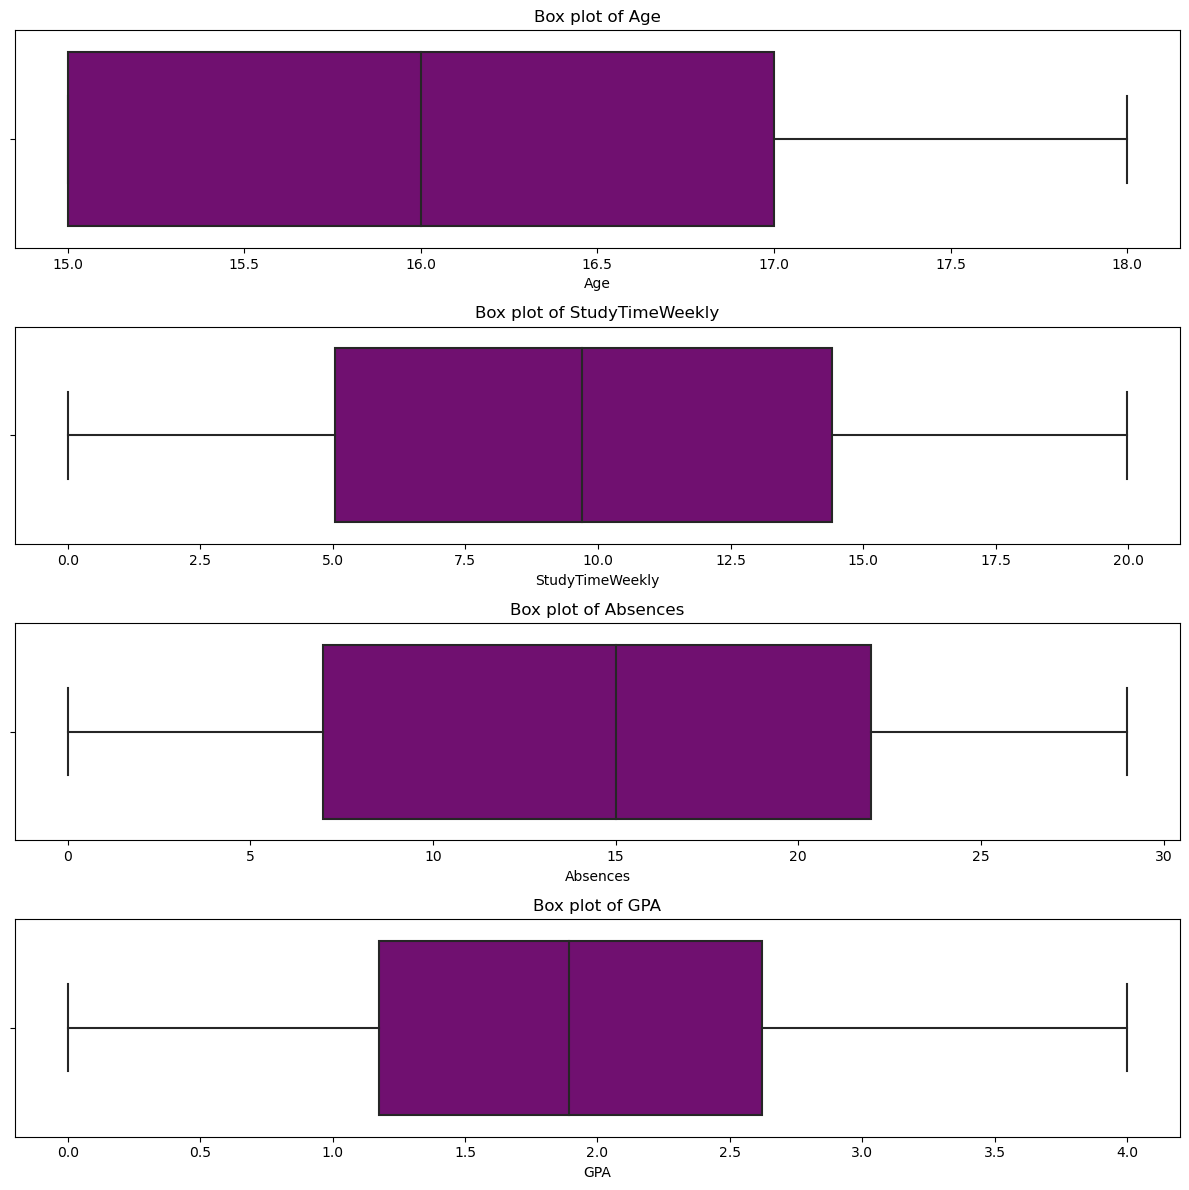

In [100]:
n_plots=len(Num_features)
fig,axes=plt.subplots(n_plots,1,figsize=(12,12))
for i,feature in enumerate(Num_features):
    sns.boxplot(x=data[feature],ax=axes[i],color='purple')
    axes[i].set_title(f"Box plot of {feature}")

    
plt.tight_layout()
plt.show()

#### KDEPLOT

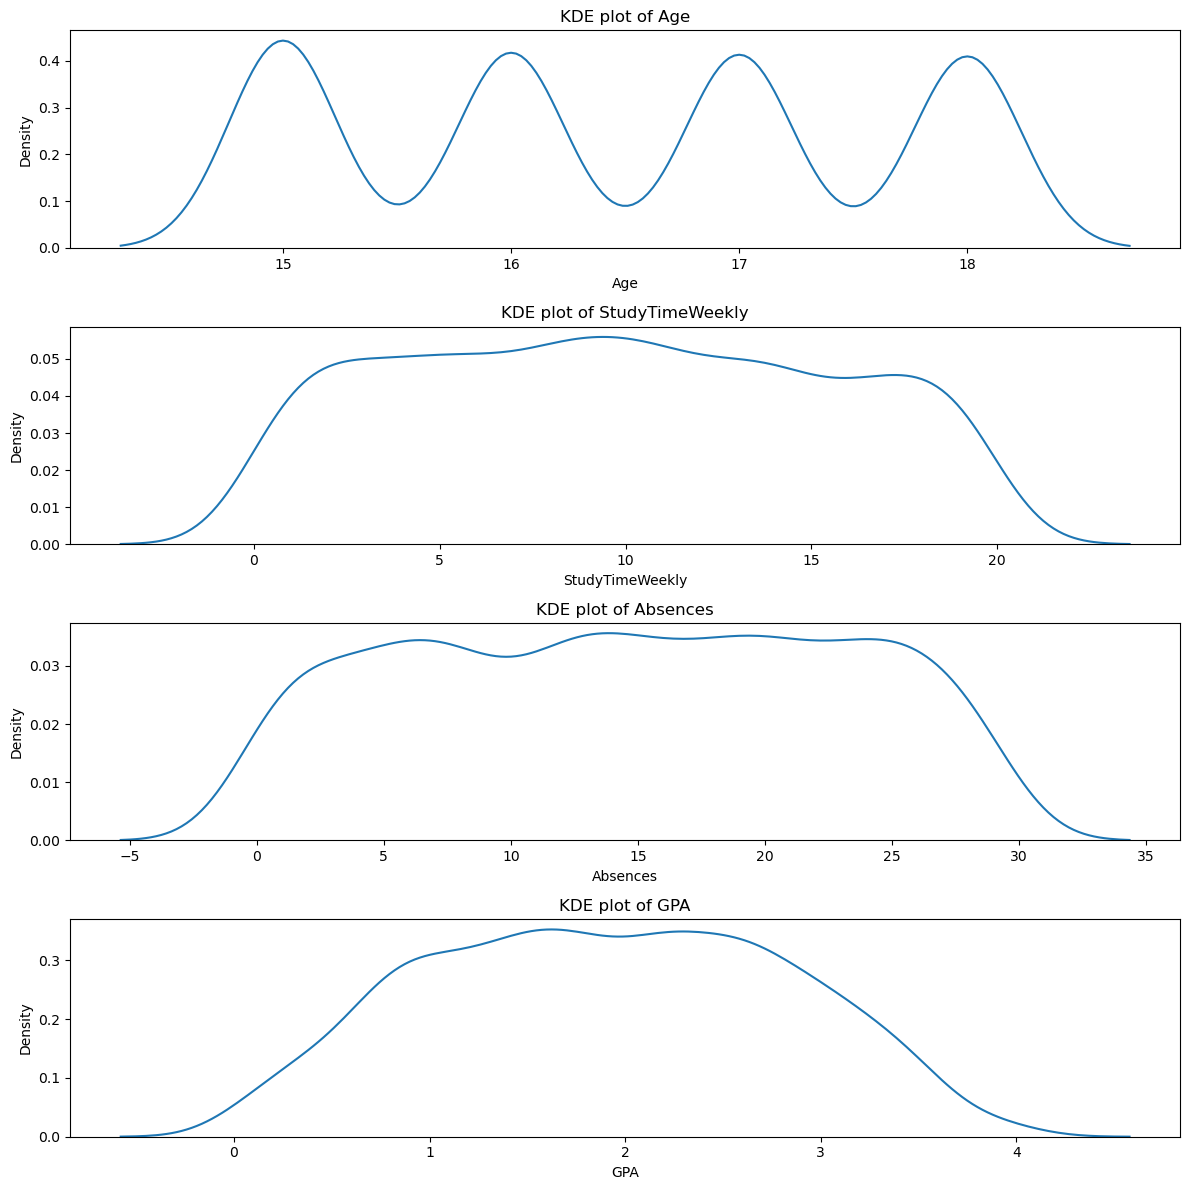

In [101]:
n_plots=len(Num_features)
fig,axes=plt.subplots(n_plots,1,figsize=(12,12))
for i,feature in enumerate(Num_features):
    sns.kdeplot(x=data[feature],ax=axes[i])
    axes[i].set_title(f"KDE plot of {feature}")

plt.tight_layout()
plt.show()

#### stats

In [102]:
data[Num_features].describe().T.round()

count  mean  std   min   25%   50%   75%   max
Age              2392.0  16.0  1.0  15.0  15.0  16.0  17.0  18.0
StudyTimeWeekly  2392.0  10.0  6.0   0.0   5.0  10.0  14.0  20.0
Absences         2392.0  15.0  8.0   0.0   7.0  15.0  22.0  29.0
GPA              2392.0   2.0  1.0   0.0   1.0   2.0   3.0   4.0

#### Skewness

In [103]:
data[Num_features].skew()

Age                0.035793
StudyTimeWeekly    0.050068
Absences          -0.026017
GPA                0.014526
dtype: float64

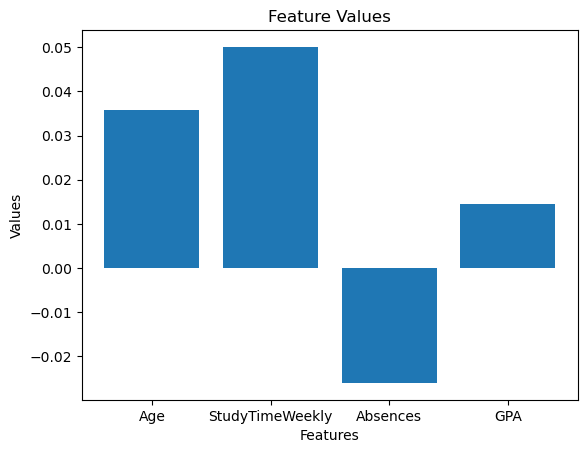

In [104]:
features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
values = [0.035793, 0.050068, -0.026017, 0.014526]

plt.bar(features, values)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Feature Values')
plt.show()

### >>>Categorical columns

In [105]:
cat_features=data.select_dtypes('object').columns
cat_features

Index(['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GradeClass'],
      dtype='object')

#### Barplot

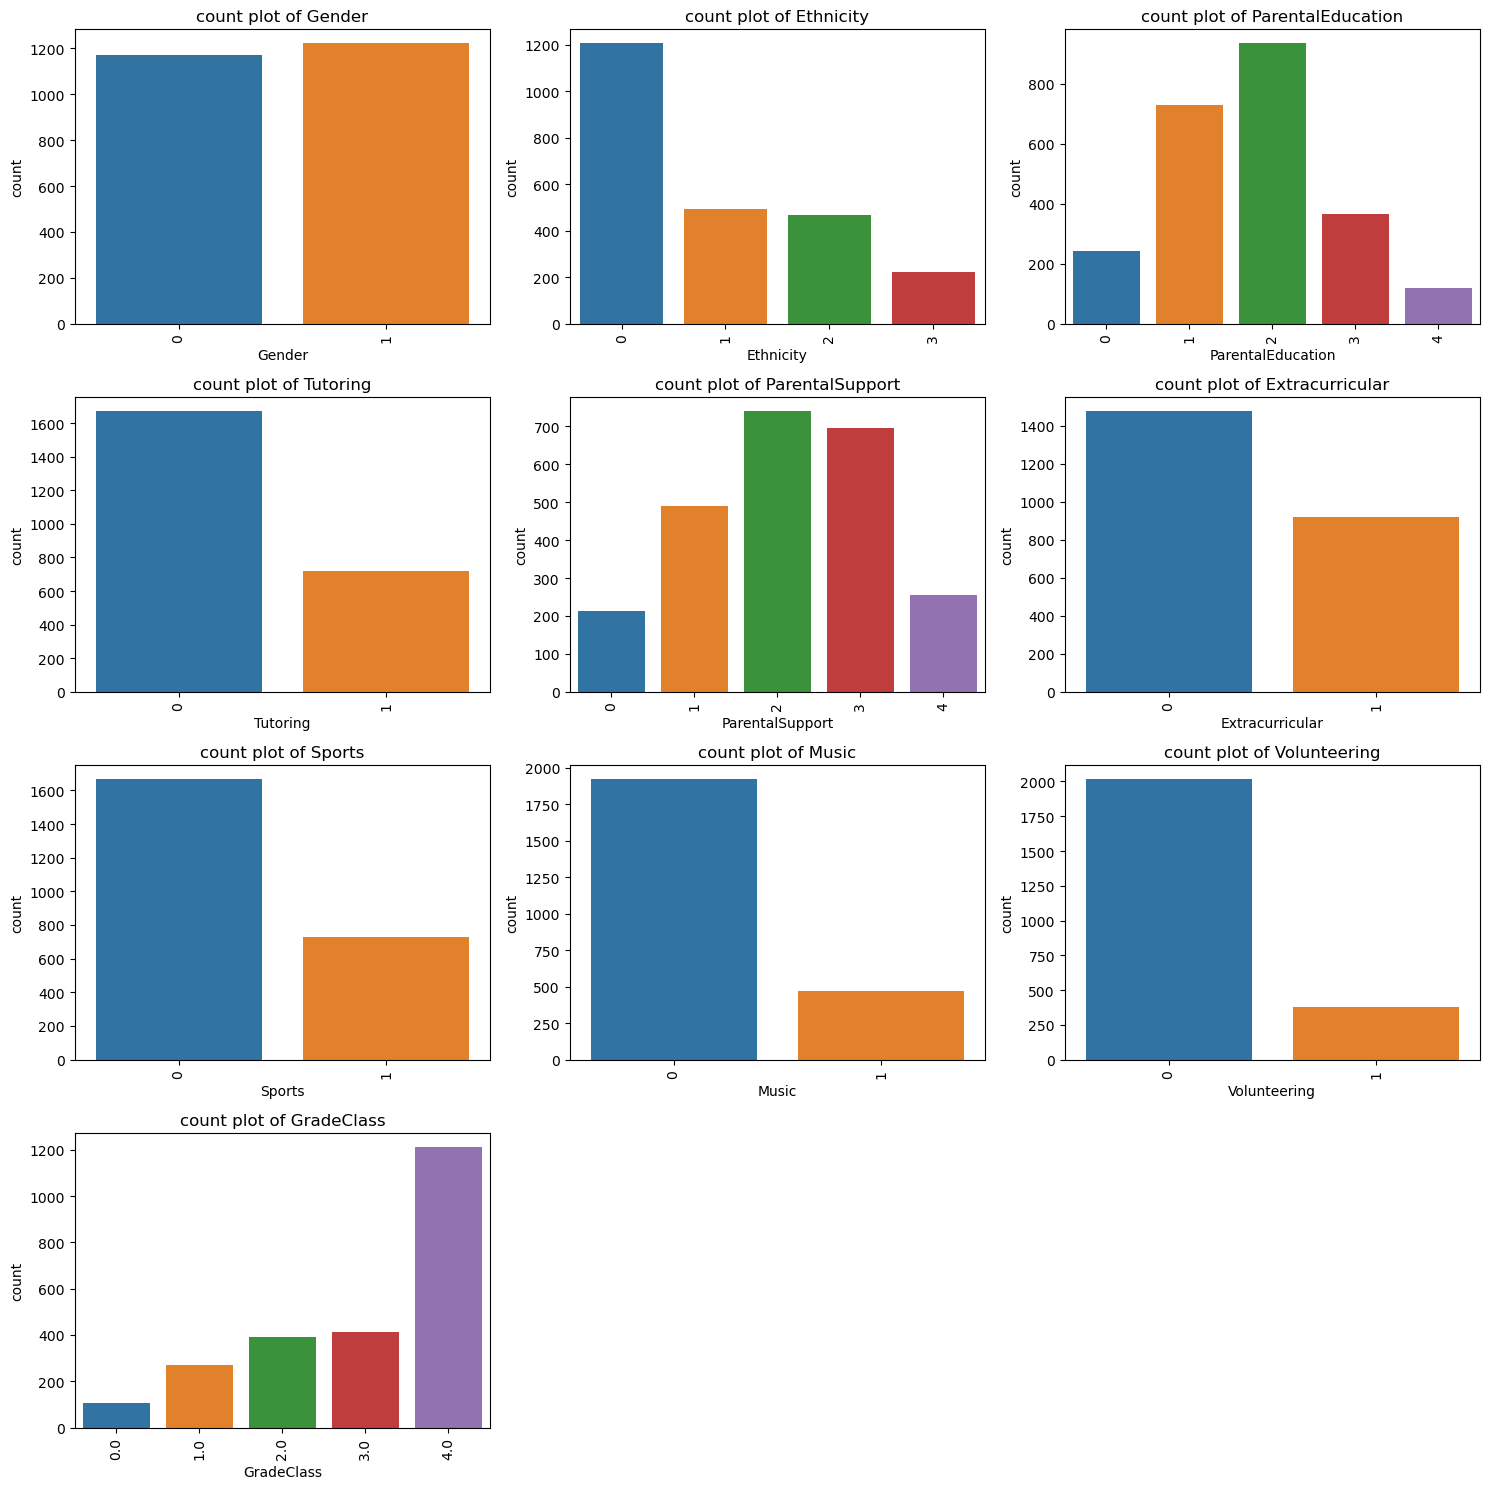

In [106]:
n_plots=len(cat_features)
n_rows=(n_plots//3)+1
n_cols=3
fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,15))
axes=axes.flatten()
for i,feature in enumerate(cat_features):
    sns.countplot(x=feature,data=data,ax=axes[i])
    axes[i].set_title(f"count plot of {feature}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
    
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

    
plt.tight_layout()
plt.show()

In [107]:
#### Pie plot

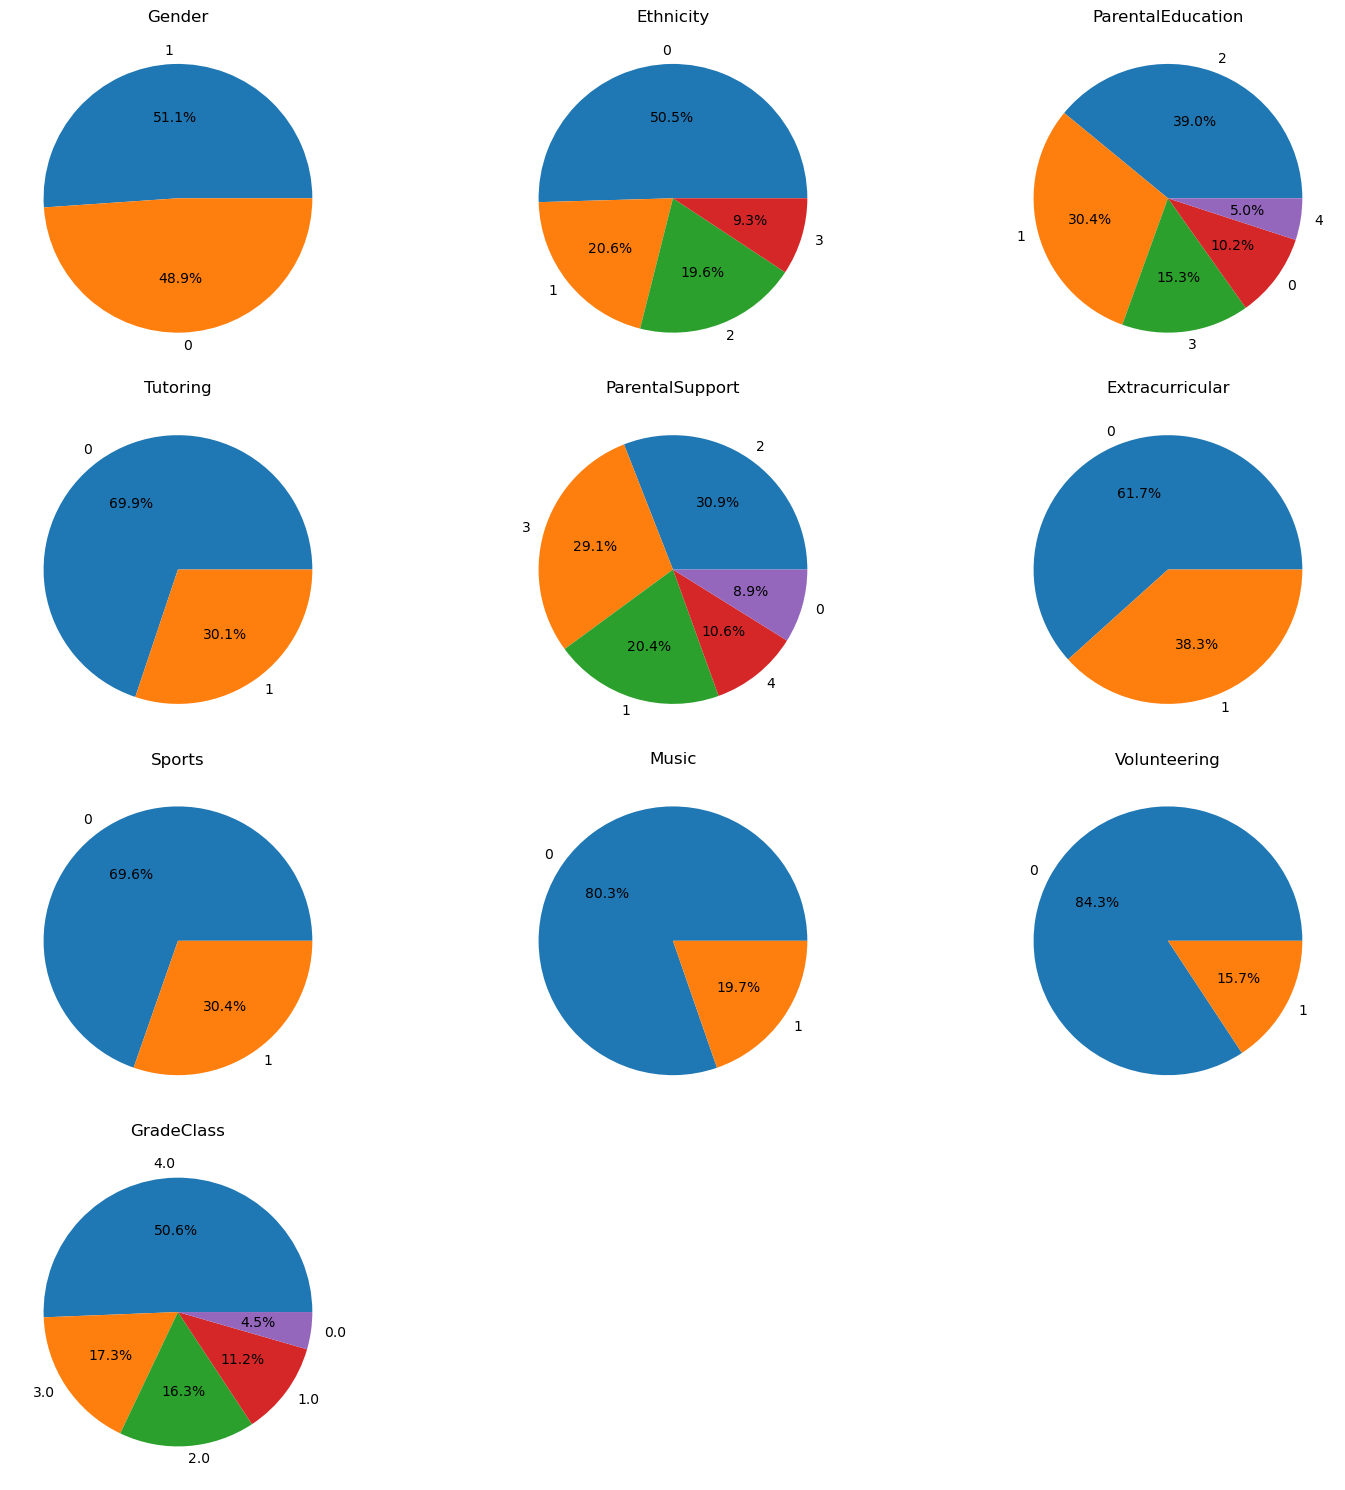

In [108]:
n_plots=len(cat_features)
n_rows=(n_plots//3)+1
n_cols=3

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,15))
axes=axes.flatten()
for i,feature in enumerate(cat_features):
    if i<len(axes):
        ax=axes[i]
        data[feature].value_counts().plot.pie(autopct='%0.1f%%',ax=ax)
        ax.set_ylabel('')
        ax.set_title(feature)
        
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

#### value counts

In [109]:
value_count_dict={}
for col in data[cat_features]:
    value_count_dict[col]=data[col].value_counts()

for col,counts in value_count_dict.items():
     print(f"Value counts of {col}:\n{counts}\n")


Value counts of Gender:
1    1222
0    1170
Name: Gender, dtype: int64

Value counts of Ethnicity:
0    1207
1     493
2     470
3     222
Name: Ethnicity, dtype: int64

Value counts of ParentalEducation:
2    934
1    728
3    367
0    243
4    120
Name: ParentalEducation, dtype: int64

Value counts of Tutoring:
0    1671
1     721
Name: Tutoring, dtype: int64

Value counts of ParentalSupport:
2    740
3    697
1    489
4    254
0    212
Name: ParentalSupport, dtype: int64

Value counts of Extracurricular:
0    1475
1     917
Name: Extracurricular, dtype: int64

Value counts of Sports:
0    1666
1     726
Name: Sports, dtype: int64

Value counts of Music:
0    1921
1     471
Name: Music, dtype: int64

Value counts of Volunteering:
0    2016
1     376
Name: Volunteering, dtype: int64

Value counts of GradeClass:
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: GradeClass, dtype: int64



## >Bivariate analysis
### >>>Categorical-Categorical

### Contigency table of Gender with other categorical columns
- mostly students are from Caucasian(0)
- very less no. of studnet are from Other ethnicity
- parents of almost students are educated 
- females do more tutoring
- females get more support from parents
- females are more involved in extracurricular(music,sports,volunteering)
- females get more good grade than males


Ethnicity    0    1    2    3
Gender                       
0          592  251  225  102
1          615  242  245  120



ParentalEducation    0    1    2    3   4
Gender                                   
0                  123  354  458  175  60
1                  120  374  476  192  60



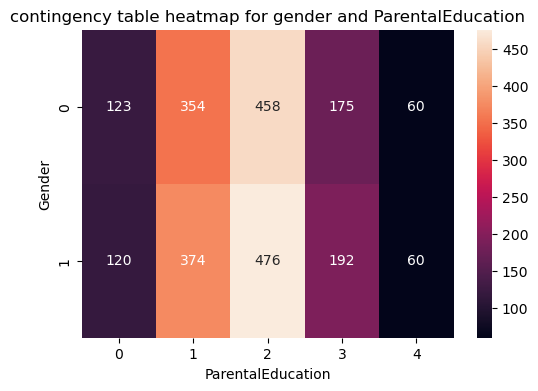

Tutoring    0    1
Gender            
0         800  370
1         871  351



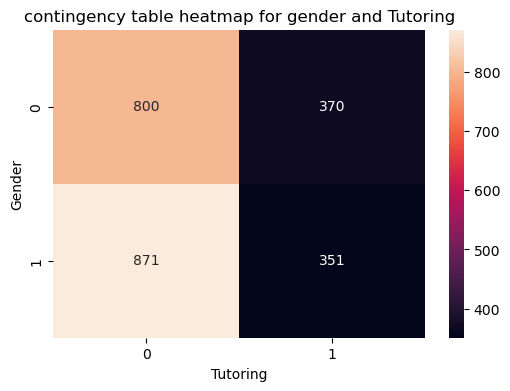

ParentalSupport    0    1    2    3    4
Gender                                  
0                110  232  362  348  118
1                102  257  378  349  136



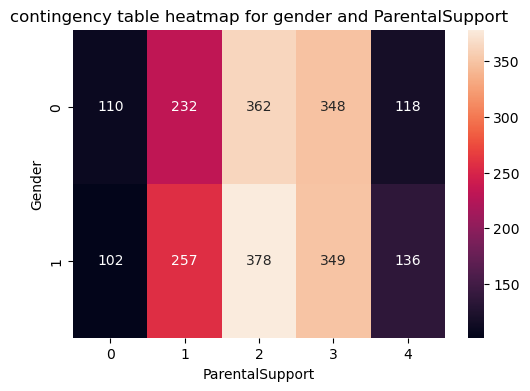

Extracurricular    0    1
Gender                   
0                718  452
1                757  465



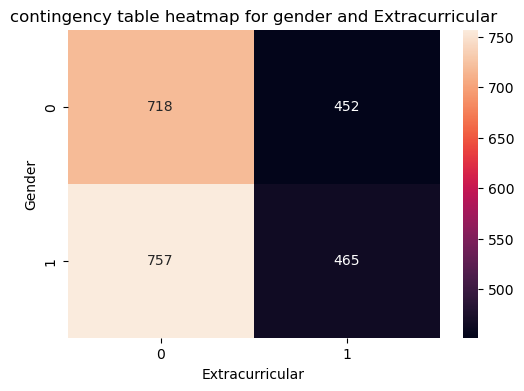

Sports    0    1
Gender          
0       810  360
1       856  366



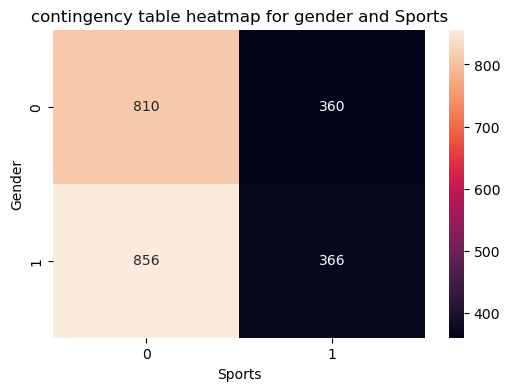

Music     0    1
Gender          
0       943  227
1       978  244



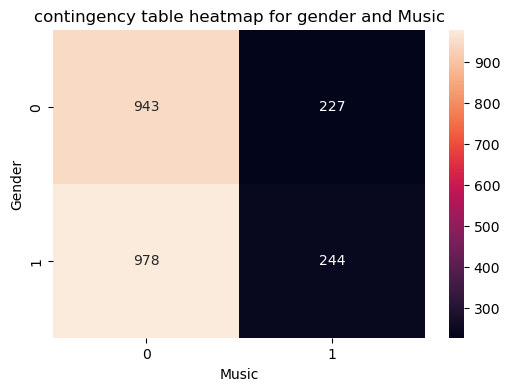

Volunteering     0    1
Gender                 
0              986  184
1             1030  192



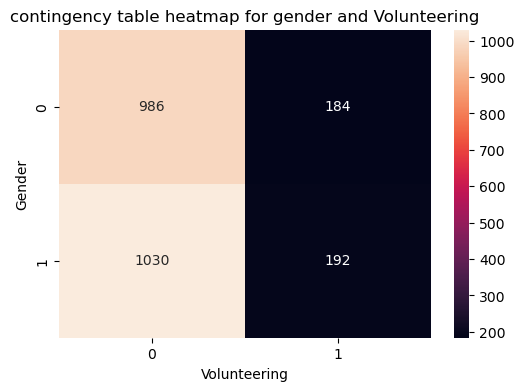

GradeClass  0.0  1.0  2.0  3.0  4.0
Gender                             
0            58  132  197  201  582
1            49  137  194  213  629



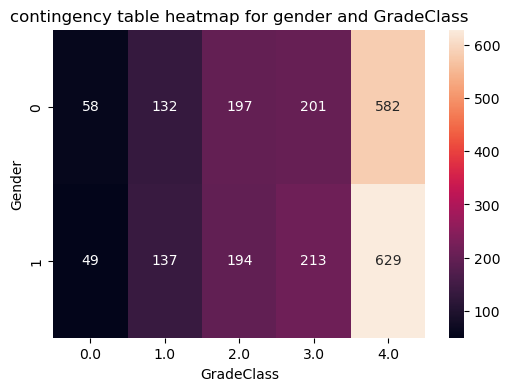

In [110]:
all_cont_table={}
cat_features=cat_features.drop('Gender')
for col in cat_features:
    ct=pd.crosstab(data['Gender'],data[col])
    all_cont_table[col]=ct

for col,table in all_cont_table.items():
    print(table)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(table,annot=True,fmt='d')
    plt.title(f'contingency table heatmap for gender and {col}')
    plt.show()

### Contigency table of EThnicity with other categorical columns
-  Caucasian parents are more educated
-  Caucasian are high in tutoring
-  Caucasian get more parental support
-  Caucasian are more involved in extracurricular(music,sports,volunteering)
- Caucasian get more good grade than others

ParentalEducation    0    1    2    3   4
Ethnicity                                
0                  120  381  462  194  50
1                   59  146  187   75  26
2                   47  137  197   63  26
3                   17   64   88   35  18



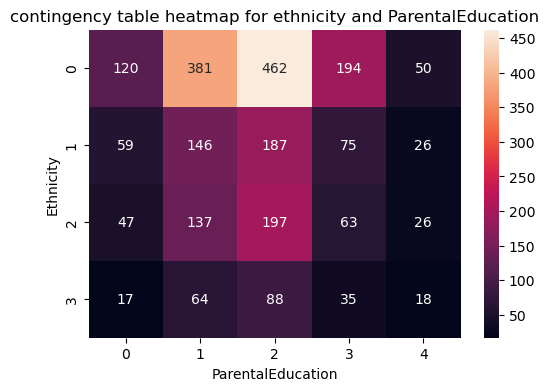

Tutoring     0    1
Ethnicity          
0          834  373
1          351  142
2          323  147
3          163   59



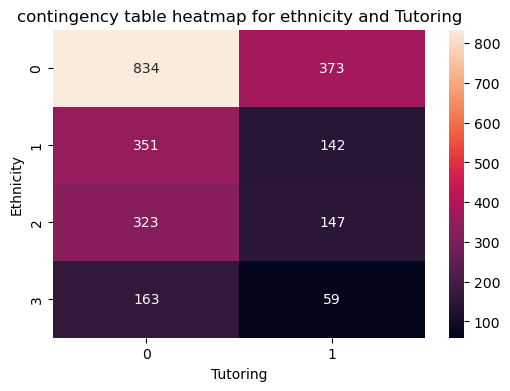

ParentalSupport    0    1    2    3    4
Ethnicity                               
0                108  254  368  339  138
1                 46  107  157  142   41
2                 40   89  148  140   53
3                 18   39   67   76   22



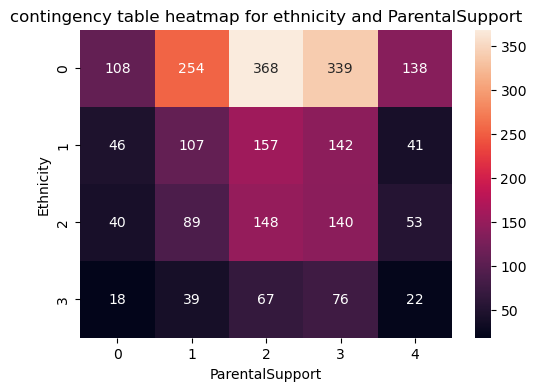

Extracurricular    0    1
Ethnicity                
0                754  453
1                282  211
2                294  176
3                145   77



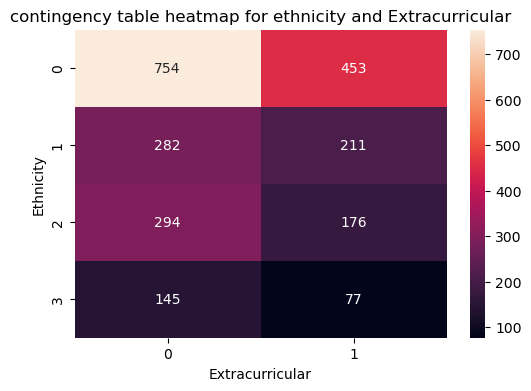

Sports       0    1
Ethnicity          
0          841  366
1          344  149
2          320  150
3          161   61



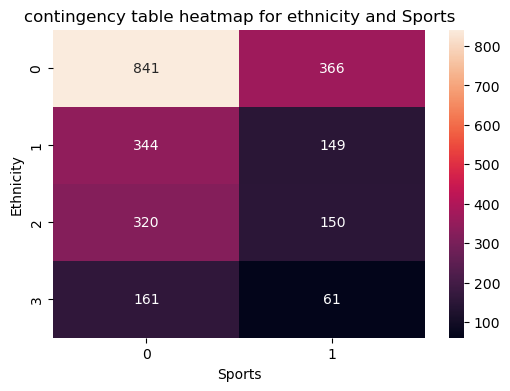

Music        0    1
Ethnicity          
0          961  246
1          402   91
2          376   94
3          182   40



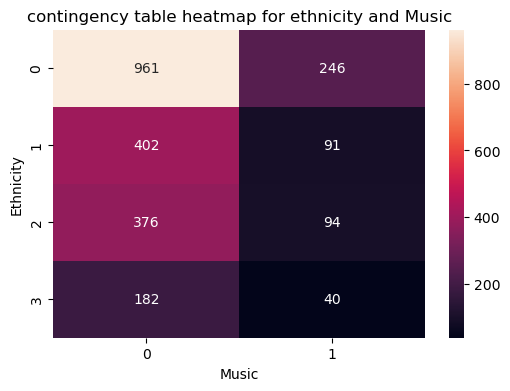

Volunteering     0    1
Ethnicity              
0             1020  187
1              422   71
2              387   83
3              187   35



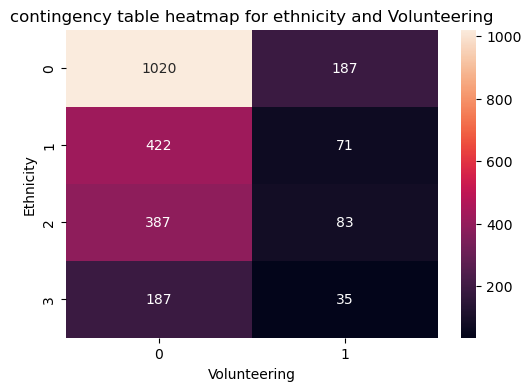

GradeClass  0.0  1.0  2.0  3.0  4.0
Ethnicity                          
0            47  136  198  194  632
1            24   59   79   91  240
2            27   47   76   86  234
3             9   27   38   43  105



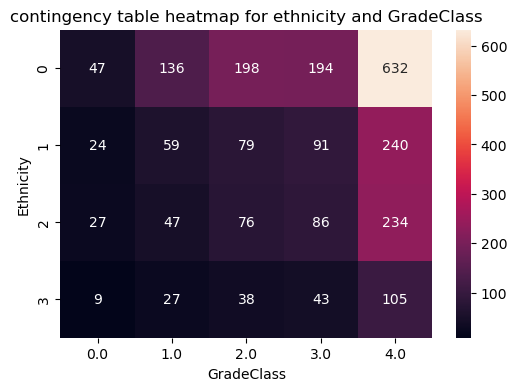

In [111]:
all_cont_table={}
cat_features=cat_features.drop('Ethnicity')
for col in cat_features:
    ct=pd.crosstab(data['Ethnicity'],data[col])
    all_cont_table[col]=ct

for col,table in all_cont_table.items():
    print(table)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(table,annot=True,fmt='d')
    plt.title(f'contingency table heatmap for ethnicity and {col}')
    plt.show()

### Contigency table of ParentalEducation with other categorical columns
- educated parents support tutoring
- educated parents are very supportive
- higher educated not support for extracurricular
- higher educated not have good grades

Tutoring             0    1
ParentalEducation          
0                  167   76
1                  504  224
2                  653  281
3                  261  106
4                   86   34



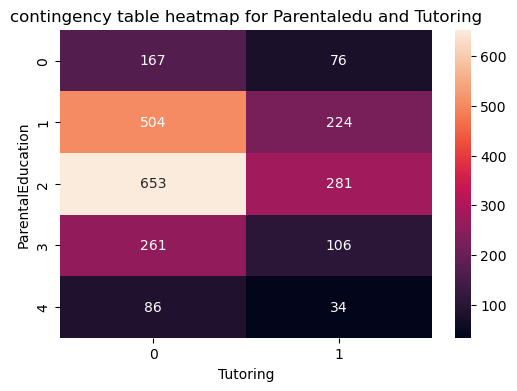

ParentalSupport     0    1    2    3    4
ParentalEducation                        
0                  20   57   80   63   23
1                  54  141  234  227   72
2                  87  196  265  266  120
3                  39   68  125  105   30
4                  12   27   36   36    9



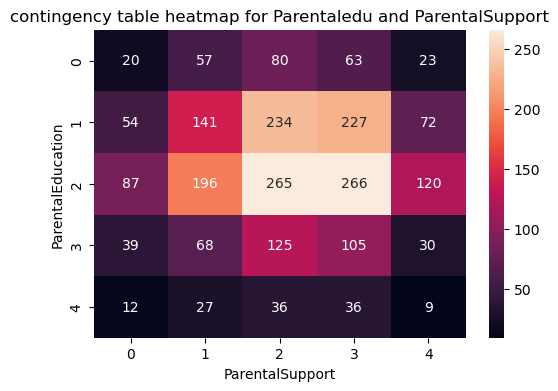

Extracurricular      0    1
ParentalEducation          
0                  159   84
1                  440  288
2                  579  355
3                  219  148
4                   78   42



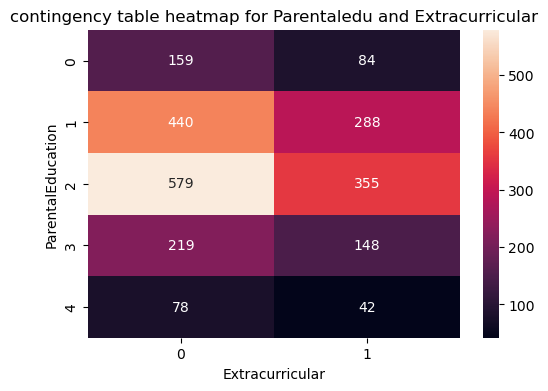

Sports               0    1
ParentalEducation          
0                  169   74
1                  506  222
2                  648  286
3                  267  100
4                   76   44



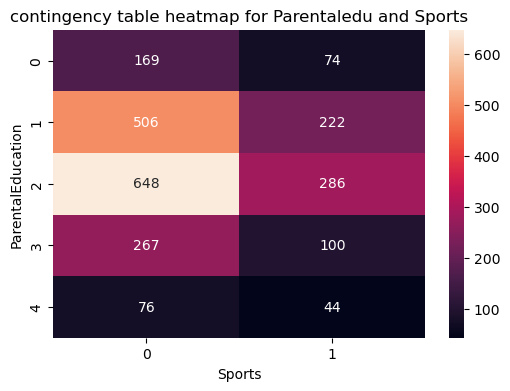

Music                0    1
ParentalEducation          
0                  207   36
1                  583  145
2                  744  190
3                  302   65
4                   85   35



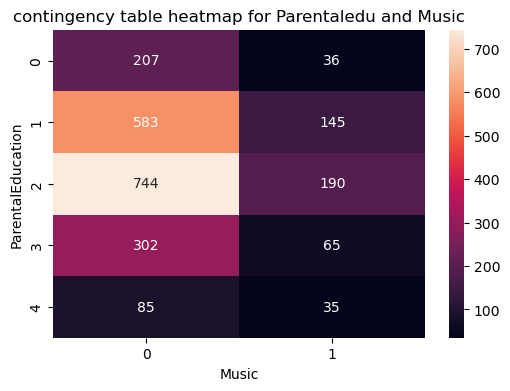

Volunteering         0    1
ParentalEducation          
0                  206   37
1                  612  116
2                  795  139
3                  304   63
4                   99   21



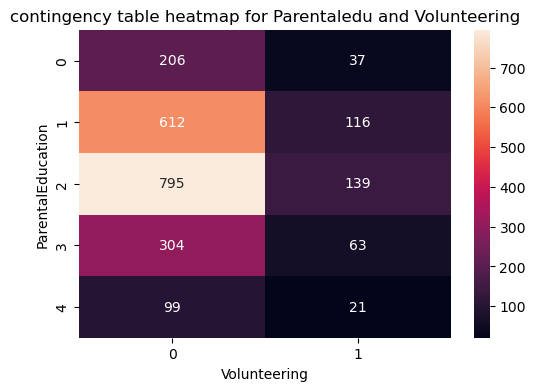

GradeClass         0.0  1.0  2.0  3.0  4.0
ParentalEducation                         
0                   11   27   42   39  124
1                   30   85  127  136  350
2                   48  108  156  150  472
3                   16   40   53   67  191
4                    2    9   13   22   74



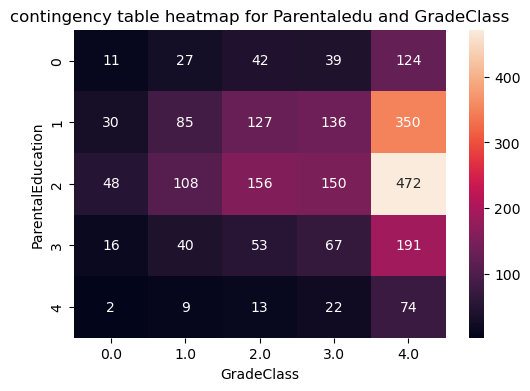

In [112]:
all_cont_table={}
cat_features=cat_features.drop('ParentalEducation')
for col in cat_features:
    ct=pd.crosstab(data['ParentalEducation'],data[col])
    all_cont_table[col]=ct

for col,table in all_cont_table.items():
    print(table)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(table,annot=True,fmt='d')
    plt.title(f'contingency table heatmap for Parentaledu and {col}')
    plt.show()

### Contigency table of Tutoring with other categorical columns
- supporting parents have children with haigh tutoring
- if high tutoring than high extracurricular
- high tur\troing good grades

ParentalSupport    0    1    2    3    4
Tutoring                                
0                151  338  514  491  177
1                 61  151  226  206   77



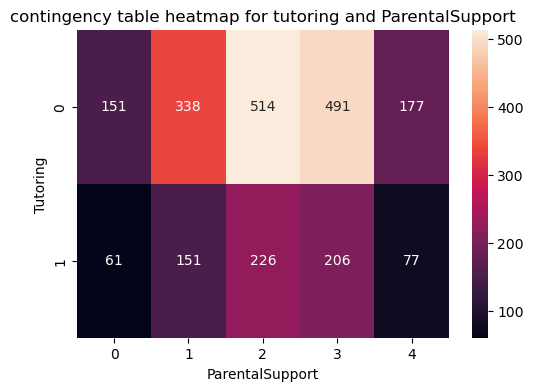

Extracurricular     0    1
Tutoring                  
0                1033  638
1                 442  279



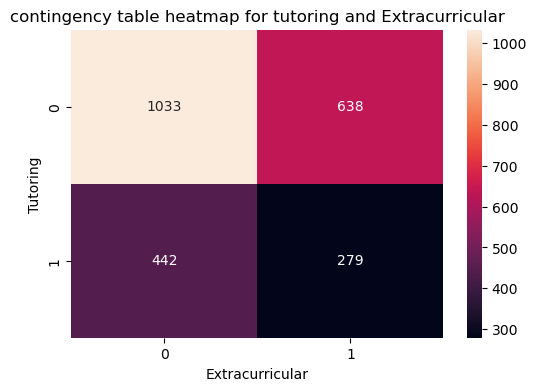

Sports       0    1
Tutoring           
0         1167  504
1          499  222



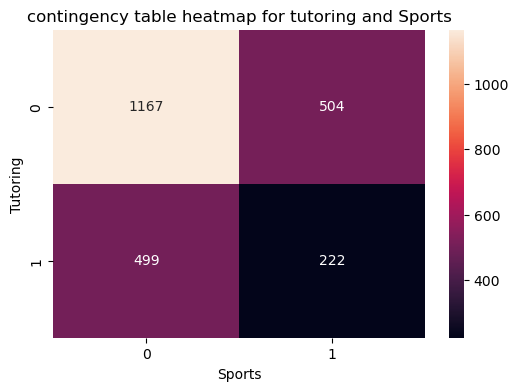

Music        0    1
Tutoring           
0         1337  334
1          584  137



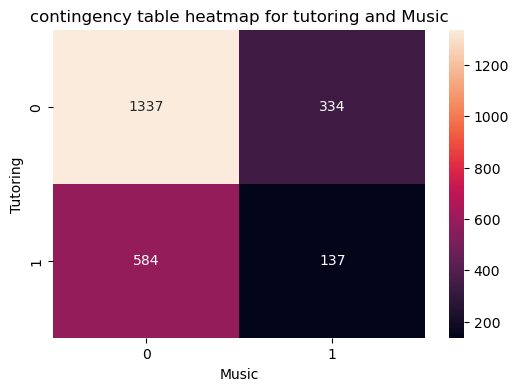

Volunteering     0    1
Tutoring               
0             1388  283
1              628   93



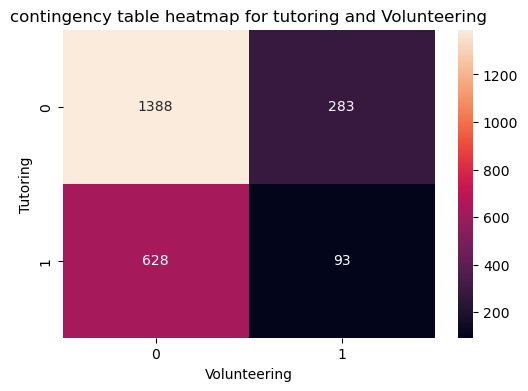

GradeClass  0.0  1.0  2.0  3.0  4.0
Tutoring                           
0            55  160  273  301  882
1            52  109  118  113  329



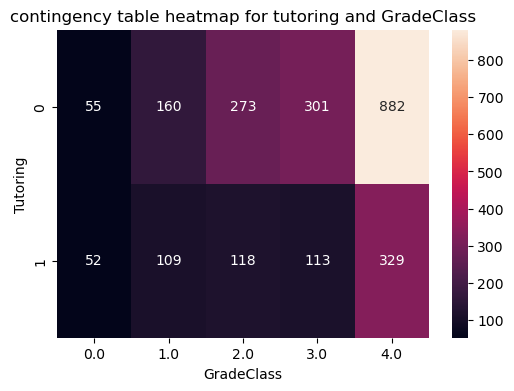

In [113]:
all_cont_table={}
cat_features=cat_features.drop('Tutoring')
for col in cat_features:
    ct=pd.crosstab(data['Tutoring'],data[col])
    all_cont_table[col]=ct

for col,table in all_cont_table.items():
    print(table)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(table,annot=True,fmt='d')
    plt.title(f'contingency table heatmap for tutoring and {col}')
    plt.show()

### Contigency table of Parentalsupport with other categorical columns
- students in extracurricular have high support from parents
- good grades

Extracurricular    0    1
ParentalSupport          
0                137   75
1                286  203
2                464  276
3                425  272
4                163   91



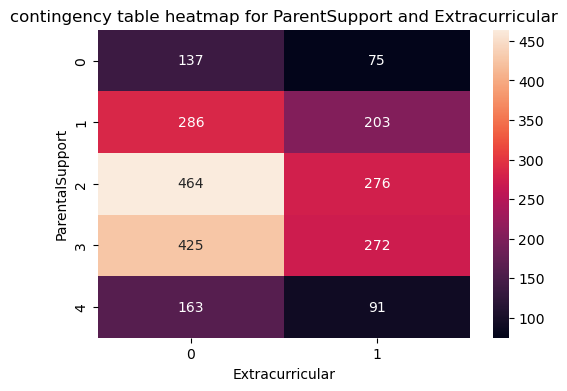

Sports             0    1
ParentalSupport          
0                140   72
1                349  140
2                515  225
3                484  213
4                178   76



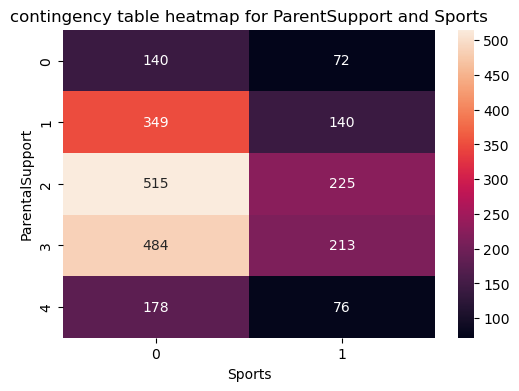

Music              0    1
ParentalSupport          
0                181   31
1                391   98
2                591  149
3                566  131
4                192   62



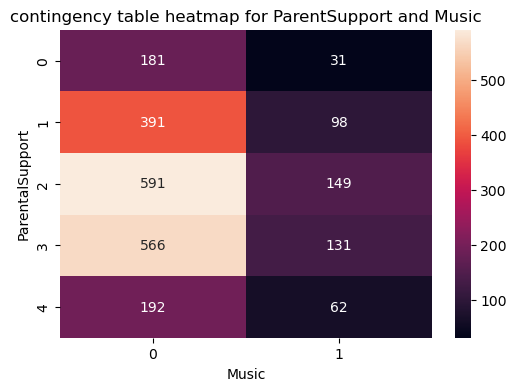

Volunteering       0    1
ParentalSupport          
0                178   34
1                421   68
2                609  131
3                587  110
4                221   33



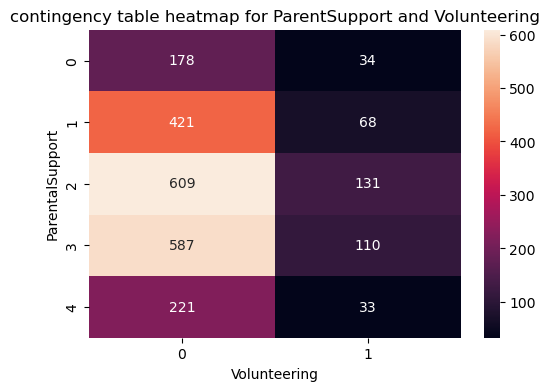

GradeClass       0.0  1.0  2.0  3.0  4.0
ParentalSupport                         
0                  5    8   37   32  130
1                 14   39   77   89  270
2                 16   97  125  122  380
3                 47   92  112  122  324
4                 25   33   40   49  107



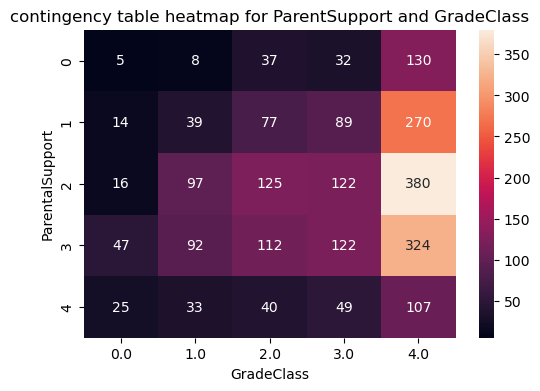

In [114]:
all_cont_table={}
cat_features=cat_features.drop('ParentalSupport')
for col in cat_features:
    ct=pd.crosstab(data['ParentalSupport'],data[col])
    all_cont_table[col]=ct

for col,table in all_cont_table.items():
    print(table)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(table,annot=True,fmt='d')
    plt.title(f'contingency table heatmap for ParentSupport and {col}')
    plt.show()

### Contigency table of extracurricular with other categorical columns
- students involve in extracurricular get good marks

Sports              0    1
Extracurricular           
0                1021  454
1                 645  272



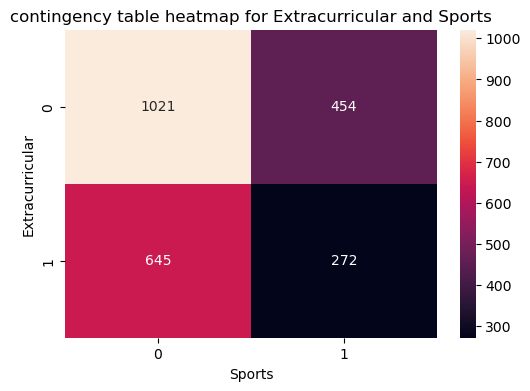

Music               0    1
Extracurricular           
0                1178  297
1                 743  174



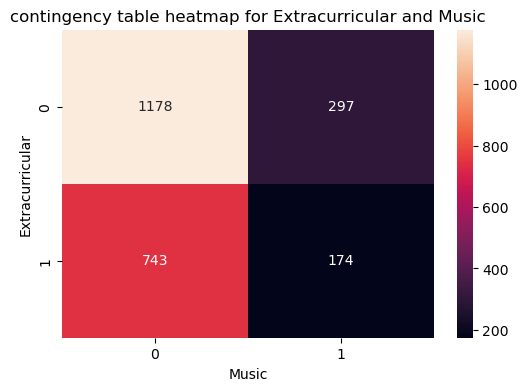

Volunteering        0    1
Extracurricular           
0                1240  235
1                 776  141



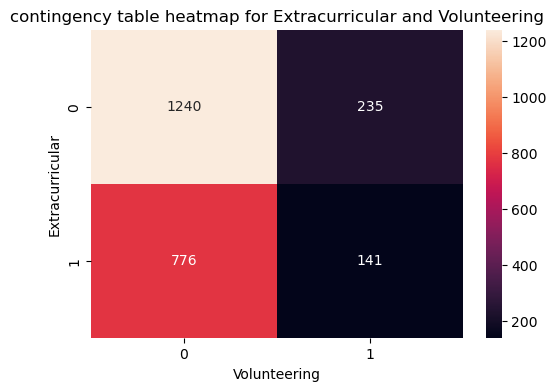

GradeClass       0.0  1.0  2.0  3.0  4.0
Extracurricular                         
0                 52  156  229  265  773
1                 55  113  162  149  438



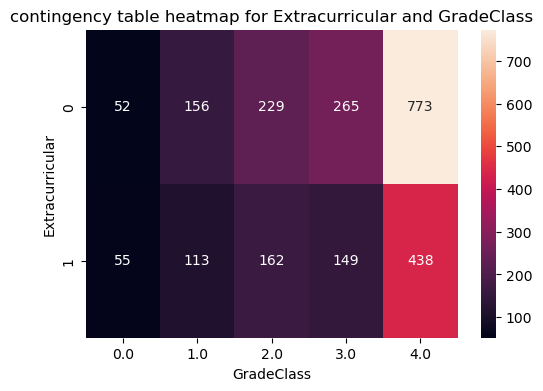

In [115]:
all_cont_table={}
cat_features=cat_features.drop('Extracurricular')
for col in cat_features:
    ct=pd.crosstab(data['Extracurricular'],data[col])
    all_cont_table[col]=ct

for col,table in all_cont_table.items():
    print(table)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(table,annot=True,fmt='d')
    plt.title(f'contingency table heatmap for Extracurricular and {col}')
    plt.show()

### Contigency table of Music with other categorical columns
- mostly are involved in all extracyrricular
- also having good grades

Sports     0    1
Music            
0       1329  592
1        337  134



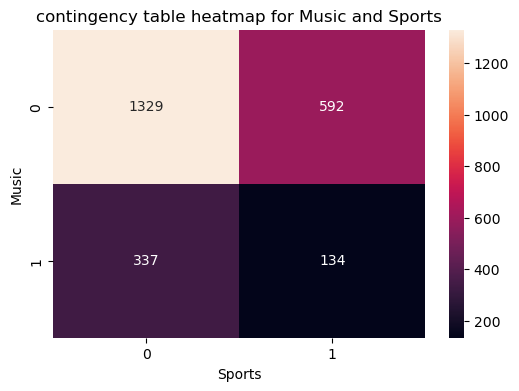

Volunteering     0    1
Music                  
0             1625  296
1              391   80



GradeClass  0.0  1.0  2.0  3.0  4.0
Music                              
0            86  199  318  333  985
1            21   70   73   81  226



In [116]:
all_cont_table={}
cat_features=cat_features.drop('Music')
for col in cat_features:
    ct=pd.crosstab(data['Music'],data[col])
    all_cont_table[col]=ct

for col,table in all_cont_table.items():
    print(table)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(table,annot=True,fmt='d')
    plt.title(f'contingency table heatmap for Music and {col}')
    plt.show()

### Contigency table of sports with other categorical columns
- mostly are involved in all extracyrricular
- also having good grade

Volunteering     0    1
Sports                 
0             1403  263
1              613  113



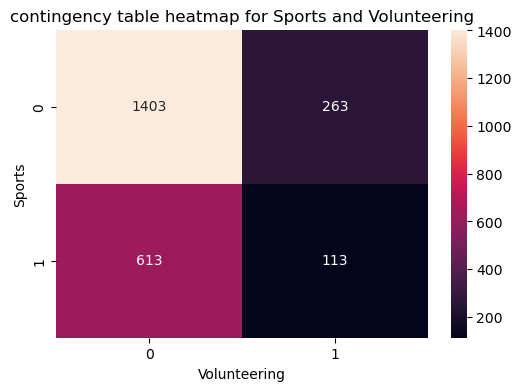

GradeClass  0.0  1.0  2.0  3.0  4.0
Sports                             
0            69  177  281  288  851
1            38   92  110  126  360



In [117]:
all_cont_table={}
cat_features=cat_features.drop('Sports')
for col in cat_features:
    ct=pd.crosstab(data['Sports'],data[col])
    all_cont_table[col]=ct

for col,table in all_cont_table.items():
    print(table)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(table,annot=True,fmt='d')
    plt.title(f'contingency table heatmap for Sports and {col}')
    plt.show()

### Contigency table of volunteering with other categorical columns
- good grades

In [118]:
all_cont_table={}
cat_features=cat_features.drop('Volunteering')
for col in cat_features:
    ct=pd.crosstab(data['Volunteering'],data[col])
    all_cont_table[col]=ct

for col,table in all_cont_table.items():
    print(table)
    print()
    plt.figure(figsize=(6,4))
    sns.heatmap(table,annot=True,fmt='d')
    plt.title(f'contingency table heatmap for Volunteering and {col}')
    plt.show()

GradeClass    0.0  1.0  2.0  3.0   4.0
Volunteering                          
0              92  225  333  354  1012
1              15   44   58   60   199



In [119]:
cat_features=data.select_dtypes('object').columns
cat_features

Index(['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GradeClass'],
      dtype='object')

### >>>Num-Cat
#### Boxplot

In [120]:
n=len(cat_features)
plt.figure(figsize=(10,20))

for i, cat_col in enumerate(cat_features,1):
    plt.subplot((n//2)+1,2,i)
    sns.boxplot(x=cat_col,y='GPA',data=data)
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

#### Kdeplot
- average students are more

In [121]:
n=len(cat_features)
plt.figure(figsize=(10,20))

for i, cat_col in enumerate(cat_features,1):
    plt.subplot((n//2)+1,2,i)
    sns.kdeplot(data=data,x="GPA",hue=data[cat_col],fill=True,palette="viridis")
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

## >Multivariate analysis
### also shows num num analysis

#### correlation
- -ve corr bw age and study/absences
- study and gpa have good corr
- absences and gpa have -ve

In [122]:
cor=data.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\1426905697.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


In [123]:
sns.heatmap(data=cor,annot=True,cmap='Blues')

<Axes: >

#### 3d scatter plot

C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\804067107.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(data['Absences'],data['StudyTimeWeekly'],data['GPA'],alpha=0.8,cmap=my_map)


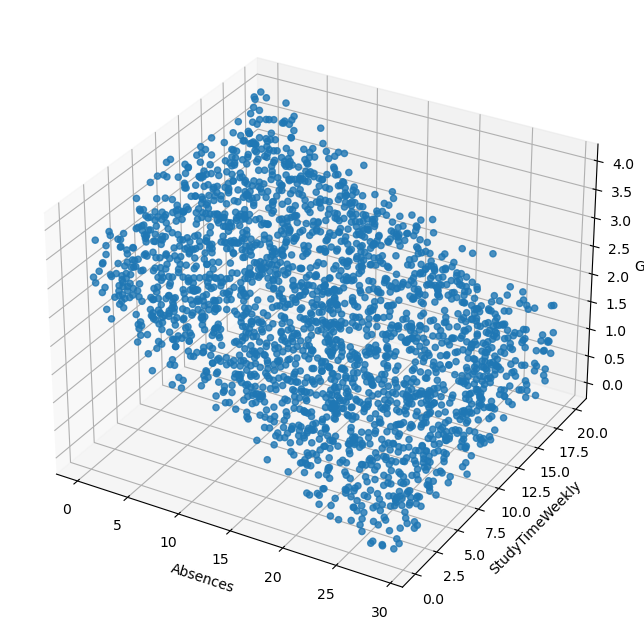

In [124]:
fig=plt.figure(figsize=(10,8))
ax=plt.axes(projection='3d')
my_map=plt.get_cmap('viridis')
ax.scatter3D(data['Absences'],data['StudyTimeWeekly'],data['GPA'],alpha=0.8,cmap=my_map)
ax.set_xlabel('Absences')
ax.set_ylabel('StudyTimeWeekly')
ax.set_zlabel('GPA')
plt.show()

In [125]:
data[['Absences','StudyTimeWeekly','GPA']].corr()

Absences  StudyTimeWeekly       GPA
Absences         1.000000         0.009326 -0.919314
StudyTimeWeekly  0.009326         1.000000  0.179275
GPA             -0.919314         0.179275  1.000000

#### Scatter plot with hue parameter

<Axes: xlabel='GPA', ylabel='StudyTimeWeekly'>

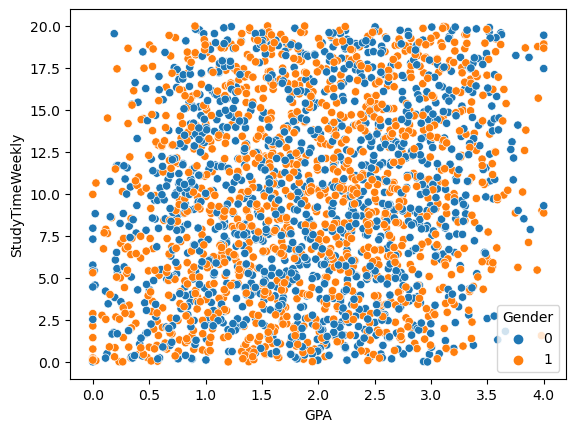

In [126]:
sns.scatterplot(data=data,x='GPA',y='StudyTimeWeekly',hue='Gender')

#### jointplot
- females study more

In [127]:
sns.jointplot(data=data,x='GPA',y='StudyTimeWeekly',kind='hist',hue='Gender')

#### facetplot

In [128]:
sns.catplot(data=data, x='Gender',y='GPA',col='Extracurricular',kind='box',row='ParentalEducation')

#### Pairplot of num variables with grade class

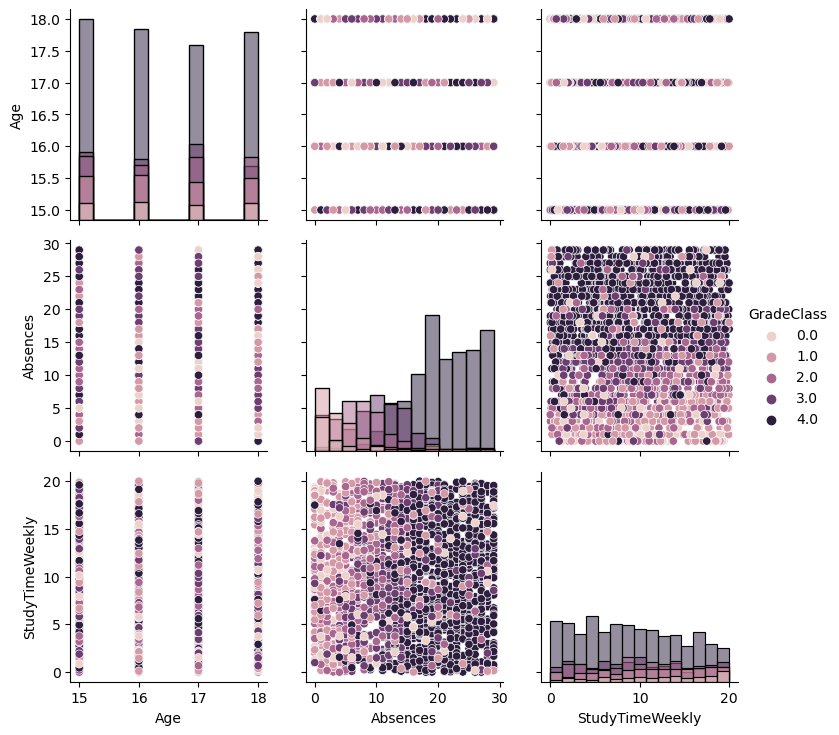

In [129]:
g = sns.PairGrid(data=data,hue='GradeClass',vars=['Age','Absences','StudyTimeWeekly'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Important Features
- important fetaures are StudyTimeWeekly,Tutoring,Parentalsupport,extracuriicular,music,sports

In [130]:
data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering']]=data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering']].astype('int64')

In [131]:
temp_cor=data.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\1867252985.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_cor=data.corr()


In [132]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=temp_cor,annot=True)

<Axes: >

In [133]:
data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering']]=data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering']].astype(object)

## Model Building
### For GPA ..linear regression

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
x = data.drop(['StudentID', 'GradeClass', 'GPA'], axis=1)
y = data[['GradeClass', 'GPA']]

In [136]:
#encoding
x = pd.get_dummies(x, columns=['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
                               'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 
                               'Volunteering'], drop_first=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\1984808880.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x = pd.get_dummies(x, columns=['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\1984808880.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x = pd.get_dummies(x, columns=['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\1984808880.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x = pd.get_dummies(x, columns=['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\1984808880.py:2: FutureWarning: In a fut

In [137]:
custom_column_names = {
    'Gender_1': 'Gender_Male',  # Assuming Gender is 0 (Female) and 1 (Male)
    'Ethnicity_1': 'Ethnicity_Group1',
    'Ethnicity_2': 'Ethnicity_Group2',
    'Ethnicity_3': 'Ethnicity_Group3',
    # Add more custom mappings as needed
    'ParentalEducation_1': 'ParentalEducation_HighSchool',
    'ParentalEducation_2': 'ParentalEducation_AssociateDegree',
    'ParentalEducation_3': 'ParentalEducation_BachelorDegree',
    'ParentalEducation_4': 'ParentalEducation_MasterDegree',
    'Tutoring_1': 'Tutoring_Yes',  # Assuming 1 represents Yes
    'ParentalSupport_1': 'ParentalSupport_Yes',  # Assuming 1 represents Yes
    'Extracurricular_1': 'Extracurricular_Yes',  # Assuming 1 represents Yes
    'Sports_1': 'Sports_Yes',  # Assuming 1 represents Yes
    'Music_1': 'Music_Yes',  # Assuming 1 represents Yes
    'Volunteering_1': 'Volunteering_Yes'  # Assuming 1 represents Yes
}

# Rename the columns
x.rename(columns=custom_column_names, inplace=True)

In [138]:
x

Age  StudyTimeWeekly  Absences  Gender_Male  Ethnicity_Group1  \
0      17        19.833723         7            1                 0   
1      18        15.408756         0            0                 0   
2      15         4.210570        26            0                 0   
3      17        10.028829        14            1                 0   
4      17         4.672495        17            1                 0   
...   ...              ...       ...          ...               ...   
2387   18        10.680555         2            1                 0   
2388   17         7.583217         4            0                 0   
2389   16         6.805500        20            1                 0   
2390   16        12.416653        17            1                 1   
2391   16        17.819907        13            1                 0   

      Ethnicity_Group2  Ethnicity_Group3  ParentalEducation_HighSchool  \
0                    0                 0                             0   
1                    0                 0                             1   
2                    1                 0                             0   
3                    0                 0                             0   
4                    0                 0                             0   
...                ...               ...                           ...   
2387                 0                 0                             0   
2388                 0                 0                             1   
2389                 0                 0                             0   
2390                 0                 0                             0   
2391                 0                 0                             0   

      ParentalEducation_AssociateDegree  ParentalEducation_BachelorDegree  \
0                                     1                                 0   
1                                     0                                 0   
2                                     0                                 1   
3                                     0                                 1   
4                                     1                                 0   
...                                 ...                               ...   
2387                                  0                                 1   
2388                                  0                                 0   
2389                                  1                                 0   
2390                                  0                                 0   
2391                                  1                                 0   

      ParentalEducation_MasterDegree  Tutoring_Yes  ParentalSupport_Yes  \
0                                  0             1                    0   
1                                  0             0                    1   
2                                  0             0                    0   
3                                  0             0                    0   
4                                  0             1                    0   
...                              ...           ...                  ...   
2387                               0             0                    0   
2388                               0             1                    0   
2389                               0             0                    0   
2390                               0             0                    0   
2391                               0             0                    0   

      ParentalSupport_2  ParentalSupport_3  ParentalSupport_4  \
0                     1                  0                  0   
1                     0                  0                  0   
2                     1                  0                  0   
3                     0                  1                  0   
4                     0                  1                  0   
...                 ...                ...      

In [139]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(x, y['GPA'], test_size=0.2, random_state=42)

In [140]:
lr=LinearRegression()

In [141]:
#fitting
lr.fit(X_train,y_train)

LinearRegression()

In [142]:
#prediction
pred=lr.predict(X_test)

In [143]:
#evalaution
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.038536930362278544
R^2 Score: 0.953397737967541


1. Mean Squared Error (MSE): 0.0385

    - Insight: This metric indicates the average squared difference between the predicted and actual values. A lower MSE suggests that the model’s predictions are close to the actual values. Since 0.0385 is relatively small, it implies that the model performs well in predicting continuous values.
2. R^2 Score: 0.9534

    - Insight: The R^2 score measures how well the model explains the variance in the target variable. An R^2 score of 0.9534 means that approximately 95.34% of the variance in the target variable is explained by the model. This is a very high score, indicating excellent model performance for regression tasks.

### For GradeClass ..random forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [145]:
x=data.drop('GradeClass',axis=1)
y=data['GradeClass']

In [146]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [147]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [148]:
clf=RandomForestClassifier()

In [149]:
clf.fit(X_train_class, y_train_class)

RandomForestClassifier()

In [150]:
y_pred = clf.predict(X_test_class)

In [151]:
print(type(label_encoder.classes_))
print(label_encoder.classes_)

<class 'numpy.ndarray'>
[0.0 1.0 2.0 3.0 4.0]


In [152]:
#changing into string list
target_names = [str(name) for name in label_encoder.classes_]

In [153]:
print(type(target_names))
print(target_names)

<class 'list'>
['0.0', '1.0', '2.0', '3.0', '4.0']


In [154]:
accuracy = accuracy_score(y_test_class, y_pred)
report = classification_report(y_test_class, y_pred, target_names=target_names)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.36      0.52        22
         1.0       0.73      0.90      0.81        49
         2.0       0.93      0.88      0.90        85
         3.0       0.89      0.91      0.90        86
         4.0       0.97      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.81      0.82       479
weighted avg       0.92      0.91      0.91       479



1.Accuracy: 0.97

 - Insight: This represents the percentage of correctly classified instances out of all instances. An accuracy of 97% suggests that the model performs exceptionally well on classification tasks.
2. Classification Report:

    - Precision:

            * 0 (Class 0): 0.99
            * 1 (Class 1): 0.96
            * 2 (Class 2): 0.98
            * Insight: Precision measures the proportion of true positive predictions among all positive predictions made by the model. The model is highly precise for all classes, with the highest precision for Class 0.
     - Recall:

            * 0 (Class 0): 0.98
            * 1 (Class 1): 0.98
            * 2 (Class 2): 0.96
            * Insight: Recall measures the proportion of actual positives correctly identified by the model. The model has high recall for all classes, indicating it successfully identifies most of the true positives.
      - F1-Score:

            * 0 (Class 0): 0.98
            * 1 (Class 1): 0.97
            * 2 (Class 2): 0.97
            * Insight: The F1-score is the harmonic mean of precision and recall. High F1-scores across all classes suggest a balanced performance between precision and recall, indicating the model's robustness.

### Clustering

In [155]:
data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering']]=data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering']].astype('int64')

In [156]:
data[['Ethnicity','ParentalEducation','Gender','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Ethnicity          2392 non-null   int64
 1   ParentalEducation  2392 non-null   int64
 2   Gender             2392 non-null   int64
 3   Tutoring           2392 non-null   int64
 4   ParentalSupport    2392 non-null   int64
 5   Extracurricular    2392 non-null   int64
 6   Sports             2392 non-null   int64
 7   Music              2392 non-null   int64
 8   Volunteering       2392 non-null   int64
dtypes: int64(9)
memory usage: 168.3 KB


### K means
- A Silhouette Score of 0.1044 suggests that the clustering with k-means is not very effective. This score is relatively low, indicating that the clusters are not well-separated and that there is a significant amount of overlap or poor assignment of data points to clusters.
- **Student Behavior:** The clusters might represent different student behavior patterns based on their attendance and study habits.
- **Performance Prediction:** Analyzing the relationship between these clusters and other variables (e.g., grades) could help predict student performance.
- **Intervention Strategies:** Identifying students in specific clusters (e.g., high absences, low study time) could help target intervention programs to improve academic outcomes

In [157]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Prepare data (excluding non-numeric features if necessary)
X = data.drop('GradeClass',axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=0).fit(X_scaled)
data['Cluster'] = kmeans.labels_

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [158]:
data.head()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA GradeClass  Cluster  
0             0  2.929196        2.0        3  
1             0  3.042915        1.0        1  
2             0  0.112602        4.0        4  
3             0  2.054218        3.0        1  
4             0  1.288061        4.0        2

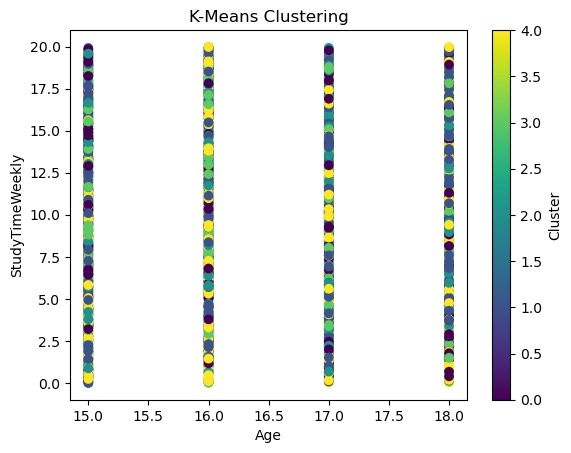

In [159]:
plt.scatter(data['Age'], data['StudyTimeWeekly'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('StudyTimeWeekly')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

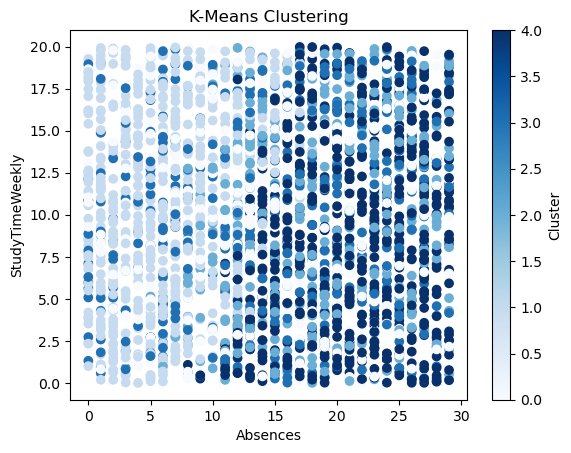

In [160]:
plt.scatter(data['Absences'], data['StudyTimeWeekly'], c=data['Cluster'], cmap='Blues')
plt.xlabel('Absences')
plt.ylabel('StudyTimeWeekly')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [161]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.0857


### Hierarchical Clustering
- A Silhouette Score of 0.5293 suggests the following:
    * **Moderate Quality:** The score is positive and above 0, which indicates that, on average, the data points are reasonably well-clustered. However, it's not exceptionally high, so there might still be some overlap or ambiguity between clusters.

    * **Room for Improvement:** While a score above 0.5 generally indicates a decent clustering result, there's potential to improve clustering quality. This could be achieved by experimenting with different numbers of clusters (k), or by exploring different clustering algorithms or preprocessing steps.

In [162]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=4).fit(X)
data['Cluster'] = clustering.labels_

In [163]:
sil_score = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.5371


In [164]:
data.groupby('Cluster').mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9308\706756000.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Cluster').mean()


StudentID        Age    Gender  Ethnicity  ParentalEducation  \
Cluster                                                                   
0        2477.007398  16.457460  0.522811   0.840937           1.741060   
1        1282.501773  16.590426  0.514184   0.913121           1.732270   
2        3137.488235  16.413725  0.480392   0.880392           1.737255   
3        1817.998028  16.406312  0.518738   0.893491           1.779093   

         StudyTimeWeekly   Absences  Tutoring  ParentalSupport  \
Cluster                                                          
0               9.719254  14.844636  0.297164         2.138101   
1               9.768796  13.895390  0.290780         2.159574   
2              10.244809  14.386275  0.294118         2.137255   
3               9.384291  14.930966  0.327416         2.039448   

         Extracurricular    Sports     Music  Volunteering       GPA  
Cluster                                                               
0               0.360049  0.288533  0.203453      0.163995  1.882495  
1               0.381206  0.320922  0.195035      0.150709  1.954428  
2               0.407843  0.307843  0.182353      0.152941  1.939753  
3               0.398422  0.303748  0.203156      0.157791  1.856652

In [165]:
x_num=x.drop('StudentID',axis=1)

In [166]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(x_num), columns=x_num.columns)

In [167]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)

plt.figure(figsize=(10, 7))
for cluster in range(4):
    plt.scatter(df_pca[data['Cluster'] == cluster, 0], df_pca[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

**Complex Relationships:**
The lack of clear boundaries suggests either closely related groups or challenges in clustering due to overlapping data.
- The clusters exhibit a degree of overlap, indicating that the data points aren't perfectly separable into distinct groups.
- The distribution of data points within each cluster appears relatively homogenous, suggesting that the clustering algorithm has successfully grouped similar data points together.
- The density of data points varies across the plot, with some regions containing a higher concentration of points than others.

In [168]:
from scipy.cluster.hierarchy import dendrogram, linkage


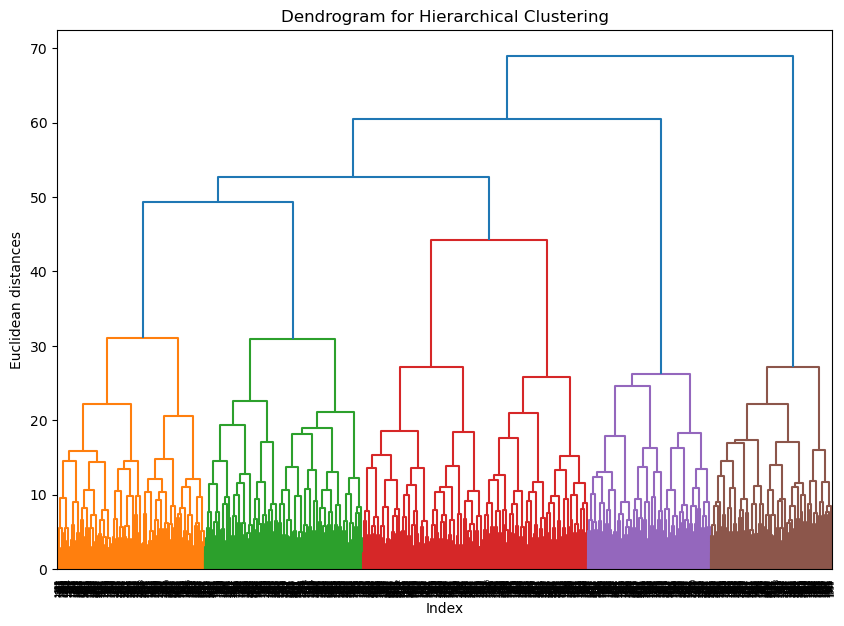

In [169]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(x_num), columns=x_num.columns)
linked = linkage(df_normalized, method='ward')  

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True) 

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

**Overall Insights:**
- **Model Performance:** Both the regression and classification models show strong performance, with high accuracy and explanatory power. The models are effective in predicting student performance and classifying students into appropriate categories.

- **Clustering Quality:** The clustering analysis suggests that while the clusters are reasonably distinct, there is an opportunity to enhance clustering quality through further optimization.

**The analysis indicates robust model performance in predicting and classifying student outcomes, with high accuracy and explanatory power. While clustering provides useful insights, there is potential for improvement to better distinguish between groups. Overall, these findings offer valuable guidance for understanding and enhancing student performance.**